Number of positive reviews: 10
Number of negative reviews: 1


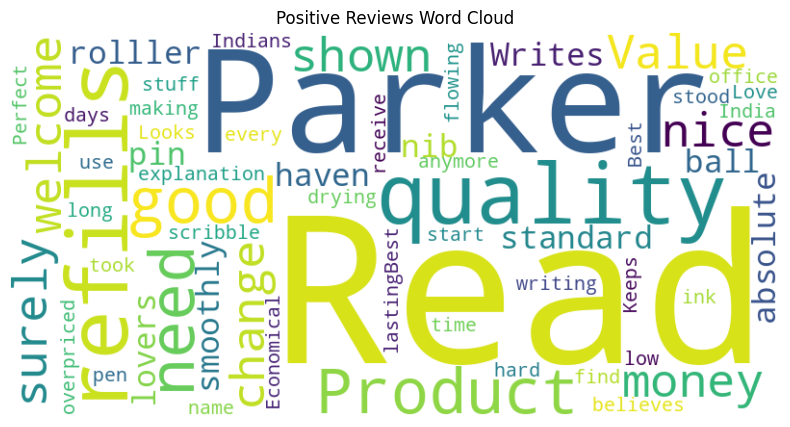

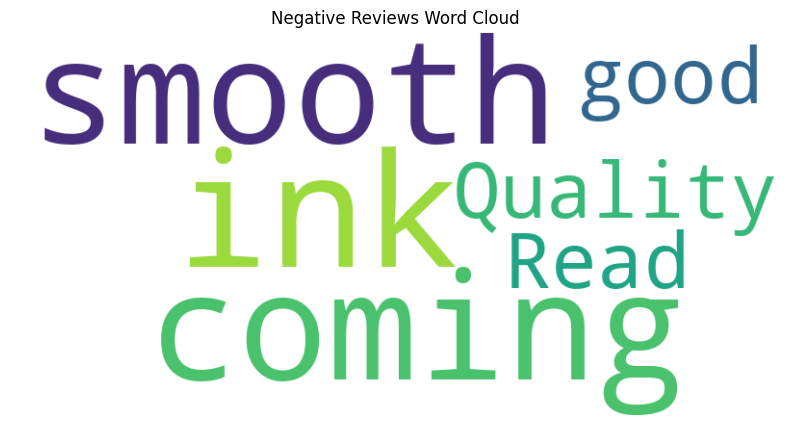

In [5]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import time

# Function to scrape Amazon reviews
def get_amazon_reviews(product_url, retries=3):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Connection': 'keep-alive',
        'DNT': '1',  # Do Not Track Request Header
        'Upgrade-Insecure-Requests': '1'
    }

    for attempt in range(retries):
        response = requests.get(product_url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            reviews = soup.find_all('span', {'data-hook': 'review-body'})
            review_texts = [review.text.strip() for review in reviews]
            return review_texts
        else:
            print(f"Attempt {attempt + 1} failed with status code {response.status_code}. Retrying...")
            time.sleep(2)  # Wait for 2 seconds before retrying

    print("Failed to retrieve the page after several attempts.")
    return []

# Function to analyze sentiments of reviews
def analyze_sentiments(reviews):
    positive_reviews = []
    negative_reviews = []
    for review in reviews:
        analysis = TextBlob(review)
        if analysis.sentiment.polarity > 0:
            positive_reviews.append(review)
        else:
            negative_reviews.append(review)
    return positive_reviews, negative_reviews

# Function to generate word cloud
def generate_word_cloud(reviews, title):
    if reviews:
        text = ' '.join(reviews)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title)
        plt.show()
    else:
        print(f"No reviews available to generate {title}.")

# Example product URL (ensure the URL is complete and correct)
product_url = 'https://www.amazon.in/Parker-Ultra-Navigator-Roller-Refill/dp/B00KJFGPNW/ref=pd_rhf_gw_s_pd_crcd_d_sccl_1_2/257-3344840-2842339?pd_rd_w=VtUcE&content-id=amzn1.sym.785b16db-ca40-46a3-ae75-2b38bb48d1aa&pf_rd_p=785b16db-ca40-46a3-ae75-2b38bb48d1aa&pf_rd_r=5VK9ZQ187WNHSMQNQ5P3&pd_rd_wg=PRJ66&pd_rd_r=7c921905-b399-4ac4-882c-b1be21cac45f&pd_rd_i=B00KJFGPNW&psc=1'

# Fetch reviews
reviews = get_amazon_reviews(product_url)

# Analyze reviews and generate word clouds if reviews are found
if reviews:
    positive_reviews, negative_reviews = analyze_sentiments(reviews)
    print(f"Number of positive reviews: {len(positive_reviews)}")
    print(f"Number of negative reviews: {len(negative_reviews)}")

    generate_word_cloud(positive_reviews, 'Positive Reviews Word Cloud')
    generate_word_cloud(negative_reviews, 'Negative Reviews Word Cloud')
else:
    print("No reviews found or failed to retrieve reviews.")
